In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def read_rpq_data(filepath):
    tasks = []
    with open(filepath, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 3:
                r, p, q = map(int, parts)
                tasks.append((r, p, q))
    return tasks

def calculate_makespan(sequence, tasks):
    time = 0
    end_time = 0
    for task in sequence:
        r, p, q = tasks[task]
        time = max(time, r) + p 
        end_time = max(end_time, time + q) 
    return end_time

def generujsasiada(sequence, N):
    i = random.randint(0, N-1)
    j = random.randint(0, N-1)
    while i == j:
        j = random.randint(0, N-1)
    sequence[i], sequence[j] = sequence[j], sequence[i]
    return sequence

def symulowane_wyzarzanie_rpq(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki):
    N = len(tasks)
    X = list(range(N))
    random.shuffle(X)
    T = temperatura_poczatkowa
    najlepsze_rozwiazanie = X[:]
    najlepszy_makespan = calculate_makespan(najlepsze_rozwiazanie, tasks)

    temperatures = [] 
    makespans = []  


    for epoka in range(max_epoki):
        for _ in range(liczba_prob):
            X_prim = generujsasiada(X[:], N)
            delta_f = calculate_makespan(X_prim, tasks) - calculate_makespan(X, tasks)

            if delta_f < 0:
                X = X_prim
                if calculate_makespan(X, tasks) < najlepszy_makespan:
                    najlepsze_rozwiazanie = X[:]
                    najlepszy_makespan = calculate_makespan(X, tasks)
            else:
                p = math.exp(-delta_f / T)
                if random.random() < p:
                    X = X_prim

        temperatures.append(T)
        makespans.append(calculate_makespan(X, tasks))

        T *= wspolczynnik_chlodzenia

    return najlepsze_rozwiazanie, najlepszy_makespan, temperatures, makespans

def symulowane_wyzarzanie_rpq2(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki):
    N = len(tasks)
    X = list(range(N))
    random.shuffle(X)
    T = temperatura_poczatkowa
    najlepsze_rozwiazanie = X[:]
    najlepszy_makespan = calculate_makespan(najlepsze_rozwiazanie, tasks)

    temperatures = []
    makespans = []

    for epoka in range(max_epoki):
        for _ in range(liczba_prob):
            X_prim = generujsasiada(X[:], N)
            
            delta_f = calculate_makespan(X_prim, tasks) - calculate_makespan(X, tasks)

            if delta_f < 0:
                X = X_prim
                if calculate_makespan(X, tasks) < najlepszy_makespan:
                    najlepsze_rozwiazanie = X[:]
                    najlepszy_makespan = calculate_makespan(X, tasks)
            else:
                p = math.exp(-delta_f / T)
                if random.random() < p:
                    X = X_prim
                    

        temperatures.append(T)
        makespans.append(calculate_makespan(X, tasks))

        T *= wspolczynnik_chlodzenia

    return najlepsze_rozwiazanie, najlepszy_makespan, temperatures, makespans

In [9]:
temperatura_poczatkowa = 10000
wspolczynnik_chlodzenia = 0.95
liczba_prob = 5
max_epoki = 2000

filepath = "rpq_100.txt"
tasks = read_rpq_data(filepath)

najlepsze_rozwiazanie, najlepszy_makespan, temperatures, makespans = symulowane_wyzarzanie_rpq(tasks, temperatura_poczatkowa, wspolczynnik_chlodzenia, liczba_prob, max_epoki)

Najlepsze rozwiązanie: [66, 96, 17, 37, 12, 21, 68, 46, 85, 15, 48, 73, 69, 20, 18, 45, 34, 70, 89, 6, 61, 83, 4, 14, 93, 54, 8, 3, 88, 35, 80, 94, 86, 22, 74, 95, 40, 10, 56, 92, 59, 30, 90, 42, 49, 55, 78, 16, 47, 25, 91, 13, 19, 23, 53, 77, 33, 11, 52, 57, 87, 39, 9, 43, 71, 5, 82, 81, 41, 72, 64, 1, 27, 63, 65, 24, 62, 29, 50, 67, 84, 7, 31, 0, 38, 99, 76, 32, 51, 28, 75, 36, 44, 26, 60, 79, 2, 58, 97, 98]
Najlepszy makespan: 2936
Wszystkie zadania zostaly uzyte


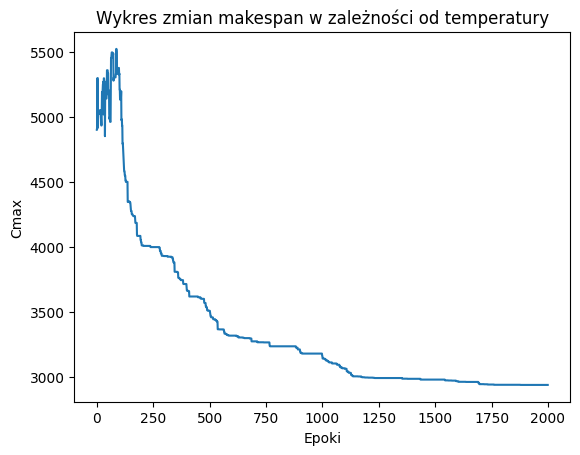

In [10]:
print("Najlepsze rozwiązanie:", najlepsze_rozwiazanie)
print("Najlepszy makespan:", najlepszy_makespan)

if set(najlepsze_rozwiazanie) == set(range(len(tasks))): # Sprawdzenie czy wszystkie zadania zostaly uzyte
    print("Wszystkie zadania zostaly uzyte")
else:
    print("Niektorych zadan brakuje")


# Rysowanie wykresu
epoki = range(max_epoki)
plt.plot(epoki, makespans)
plt.xlabel('Epoki')
plt.ylabel('Cmax')
plt.title('Wykres zmian makespan w zależności od temperatury')
plt.show()